In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [9]:
#Defining constants
c=2.98e8 #speed of light
lam=437e-9 #laser wavelength
w0= 2*np.pi*c/lam #laser frequency
L=4000 #length of fabry Perot cavity
TI=0.01 #energy transmissivity of input mirror
TE=1e-5 #energy transmissivity of end mirror
tI=np.sqrt(TI) #amplitude transmissivity of input mirror
tE=np.sqrt(TE) #amplitdue transmissivity of end mirror
RI=1-TI # energy reflectivity of input mirror
RE=1-TE #energy reflectivity of end mirror
rI=np.sqrt(RI) #amplitude reflectivity of input mirror
rE=np.sqrt(RE) #amplitude reflectivity of end mirror
Pin=100 #laser power
def ph(w): #phase accumaled over a half round trip in the FP cavity
        return w*L/c

In [50]:
#Define adjacency matrix for FP
def A(w):
    M = np.zeros([7,7],complex)
    M[1,0] = tI
    M[1,5]=rI
    M[2,1]=np.exp(-ph(w)*1j)
    M[3,2]=tE
    M[4,2]=-rE
    M[5,4]=np.exp(-ph(w)*1j)
    M[6,1]=-rI
    M[6,5]=tI
    return M

In [12]:
# function that calculates system matrix G = (1-A)^(-1) for FP
def G(w):
    return inv(np.identity(7,complex) - A(w))

In [20]:
#define a function that computes Delta P/ x_0 in eq. 22 for FP
def Transfer(w):
    z=2j*rE*(w0/c)*(np.conj(G(w0)[3,0])*G(w0+w)[3,4]*G(w0)[2,0]-G(w0)[3,0]*np.conj(G(w0-w)[3,4]*G(w0)[2,0]))*Pin
    return abs(z)

In [39]:
#plot for FP
x = np.arange(-5e4, 5e4,1e3)
y = list(map(Transfer, x))

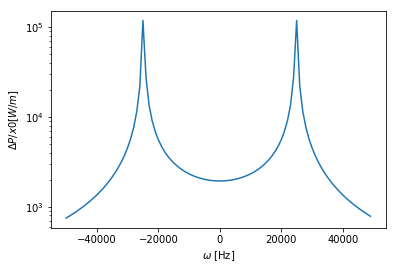

In [43]:
plt.semilogy(x, y)
plt.xlabel(r'$\omega$ [Hz]')
plt.ylabel(r'$\Delta P/x0 [W/m]$')
plt.savefig("2b.pdf")

In [76]:
#part 2c
#extra parameters for 2c
tBS=1/np.sqrt(2)#beam splitter tranmissivity
rBS=1/np.sqrt(2) #beam splitter reflectivity
d=0 # distance to the y FP cavity. The field at the antisymmetric port depends on d when Del is not zero, but the power doesn't
Del=1e-10 #difference between distance to x cavity and the distance to the y cavity
def phx(w): #phase accumulated travelling to the x FP cavity
        return w*(d+Del)/c
def phy(w): #phase accumulated travelling to the y FP cavity
        return w*(d)/c

In [77]:
#Define adjacency matrix for Michelson
def A(w):
    M = np.zeros([13,13],complex)
    M[1,0] = tBS*np.exp(-1j*phx(w))
    M[2,1]=tI
    M[2,3]=rI*np.exp(-1j*ph(w))
    M[3,2]=-rE*np.exp(-1j*ph(w))
    M[4,2]=tE*np.exp(-1j*phx(w))
    M[5,1]=-rI
    M[5,3]=tI*np.exp(-1j*ph(w))
    M[6,0]=-rBS*np.exp(-1j*phy(w))
    M[7,6]=tI
    M[7,9]=rI*np.exp(-1j*ph(w))
    M[8,7]=tE*np.exp(-1j*ph(w))
    M[9,7]=-rE*np.exp(-1j*ph(w))
    M[10,6]=-rI
    M[10,9]=tI*np.exp(-1j*ph(w))
    M[11,5]=tBS*np.exp(-1j*phx(w))
    M[11,10]=-rBS*np.exp(-1j*phy(w))
    M[12,5]=rBS*np.exp(-1j*phx(w))
    M[12,10]=tBS*np.exp(-1j*phy(w))
    return M

In [78]:
# function that calculates system matrix G = (1-A)^(-1) for Michelson
def G(w):
    return inv(np.identity(13,complex) - A(w))

In [79]:
#define a function that computes Delta P/ x_0 in eq. 26 for Michelson
def Transfer(w):
    z=2j*rE*(w0/c)*(np.conj(G(w0)[12,0])*G(w0+w)[12,3]*G(w0)[2,0]-G(w0)[12,0]*np.conj(G(w0-w)[12,3]*G(w0)[2,0]))*Pin
    return abs(z)

In [80]:
#plot for Michelson
x = np.arange(-5e4, 5e4,1e3)
y = list(map(Transfer, x))

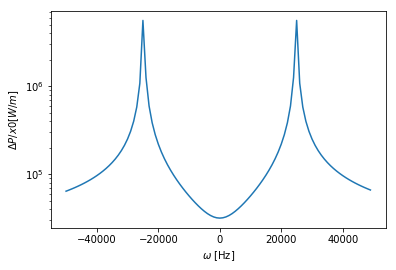

In [81]:
plt.semilogy(x, y)
plt.xlabel(r'$\omega$ [Hz]')
plt.ylabel(r'$\Delta P/x0 [W/m]$')
plt.savefig("2c.pdf")